## RAZON POR LA QUE SE ELIGIÓ EL DATASET

Elegí este dataset porque la cultura del vino es un pilar de la gastronomia, y como alguien interesado en estas cosas, me motiva analizar cómo factores como el precio o el número de reseñas predicen la calidad del vino. Este dataset en español permite aplicar modelos de machine learning como Regresión Lineal y Árboles de Decisión, generando visualizaciones claras que ayudan en mi aprendizaje en el campo de la ciencia de datos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import os
import joblib


### preparamos los datos del dataframe

In [5]:
data = pd.read_csv('../data/data.csv')

numeric_cols = ['price', 'rating', 'num_reviews', 'body', 'acidity']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.dropna(subset=numeric_cols)

print(f"Datos después de limpieza: {len(data)} filas")

data['calidad_alta'] = (data['rating'] >= 4.5).astype(int)
features = ['price', 'num_reviews', 'body', 'acidity']
X, y = data[features], data['calidad_alta']

Datos después de limpieza: 6331 filas


### entrenamiento y predicción

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = DecisionTreeClassifier(max_depth=4, min_samples_split=30, 
                               min_samples_leaf=15, random_state=42)
modelo.fit(X_train, y_train)

precision = accuracy_score(y_test, modelo.predict(X_test))
print(f"Precisión del modelo: {precision:.2%}")

Precisión del modelo: 92.68%


### guardamos el modelo y lo probamos

In [7]:
joblib.dump(modelo, 'modelo_vinos.pkl')
print("Modelo guardado como 'modelo_vinos.pkl'")

modelo_cargado = joblib.load('modelo_vinos.pkl')


ejemplo = [[25, 100, 2.5, 2.8]]
prediccion = modelo_cargado.predict(ejemplo)

print(f"Predicción de prueba: {'Premium' if prediccion[0] == 1 else 'Común'}")
print("El modelo cargado funciona correctamente")


Modelo guardado como 'modelo_vinos.pkl'
Predicción de prueba: Común
El modelo cargado funciona correctamente


c:\Users\Asus\Desktop\tlp3-tp-evaluativo-ML\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### grafico

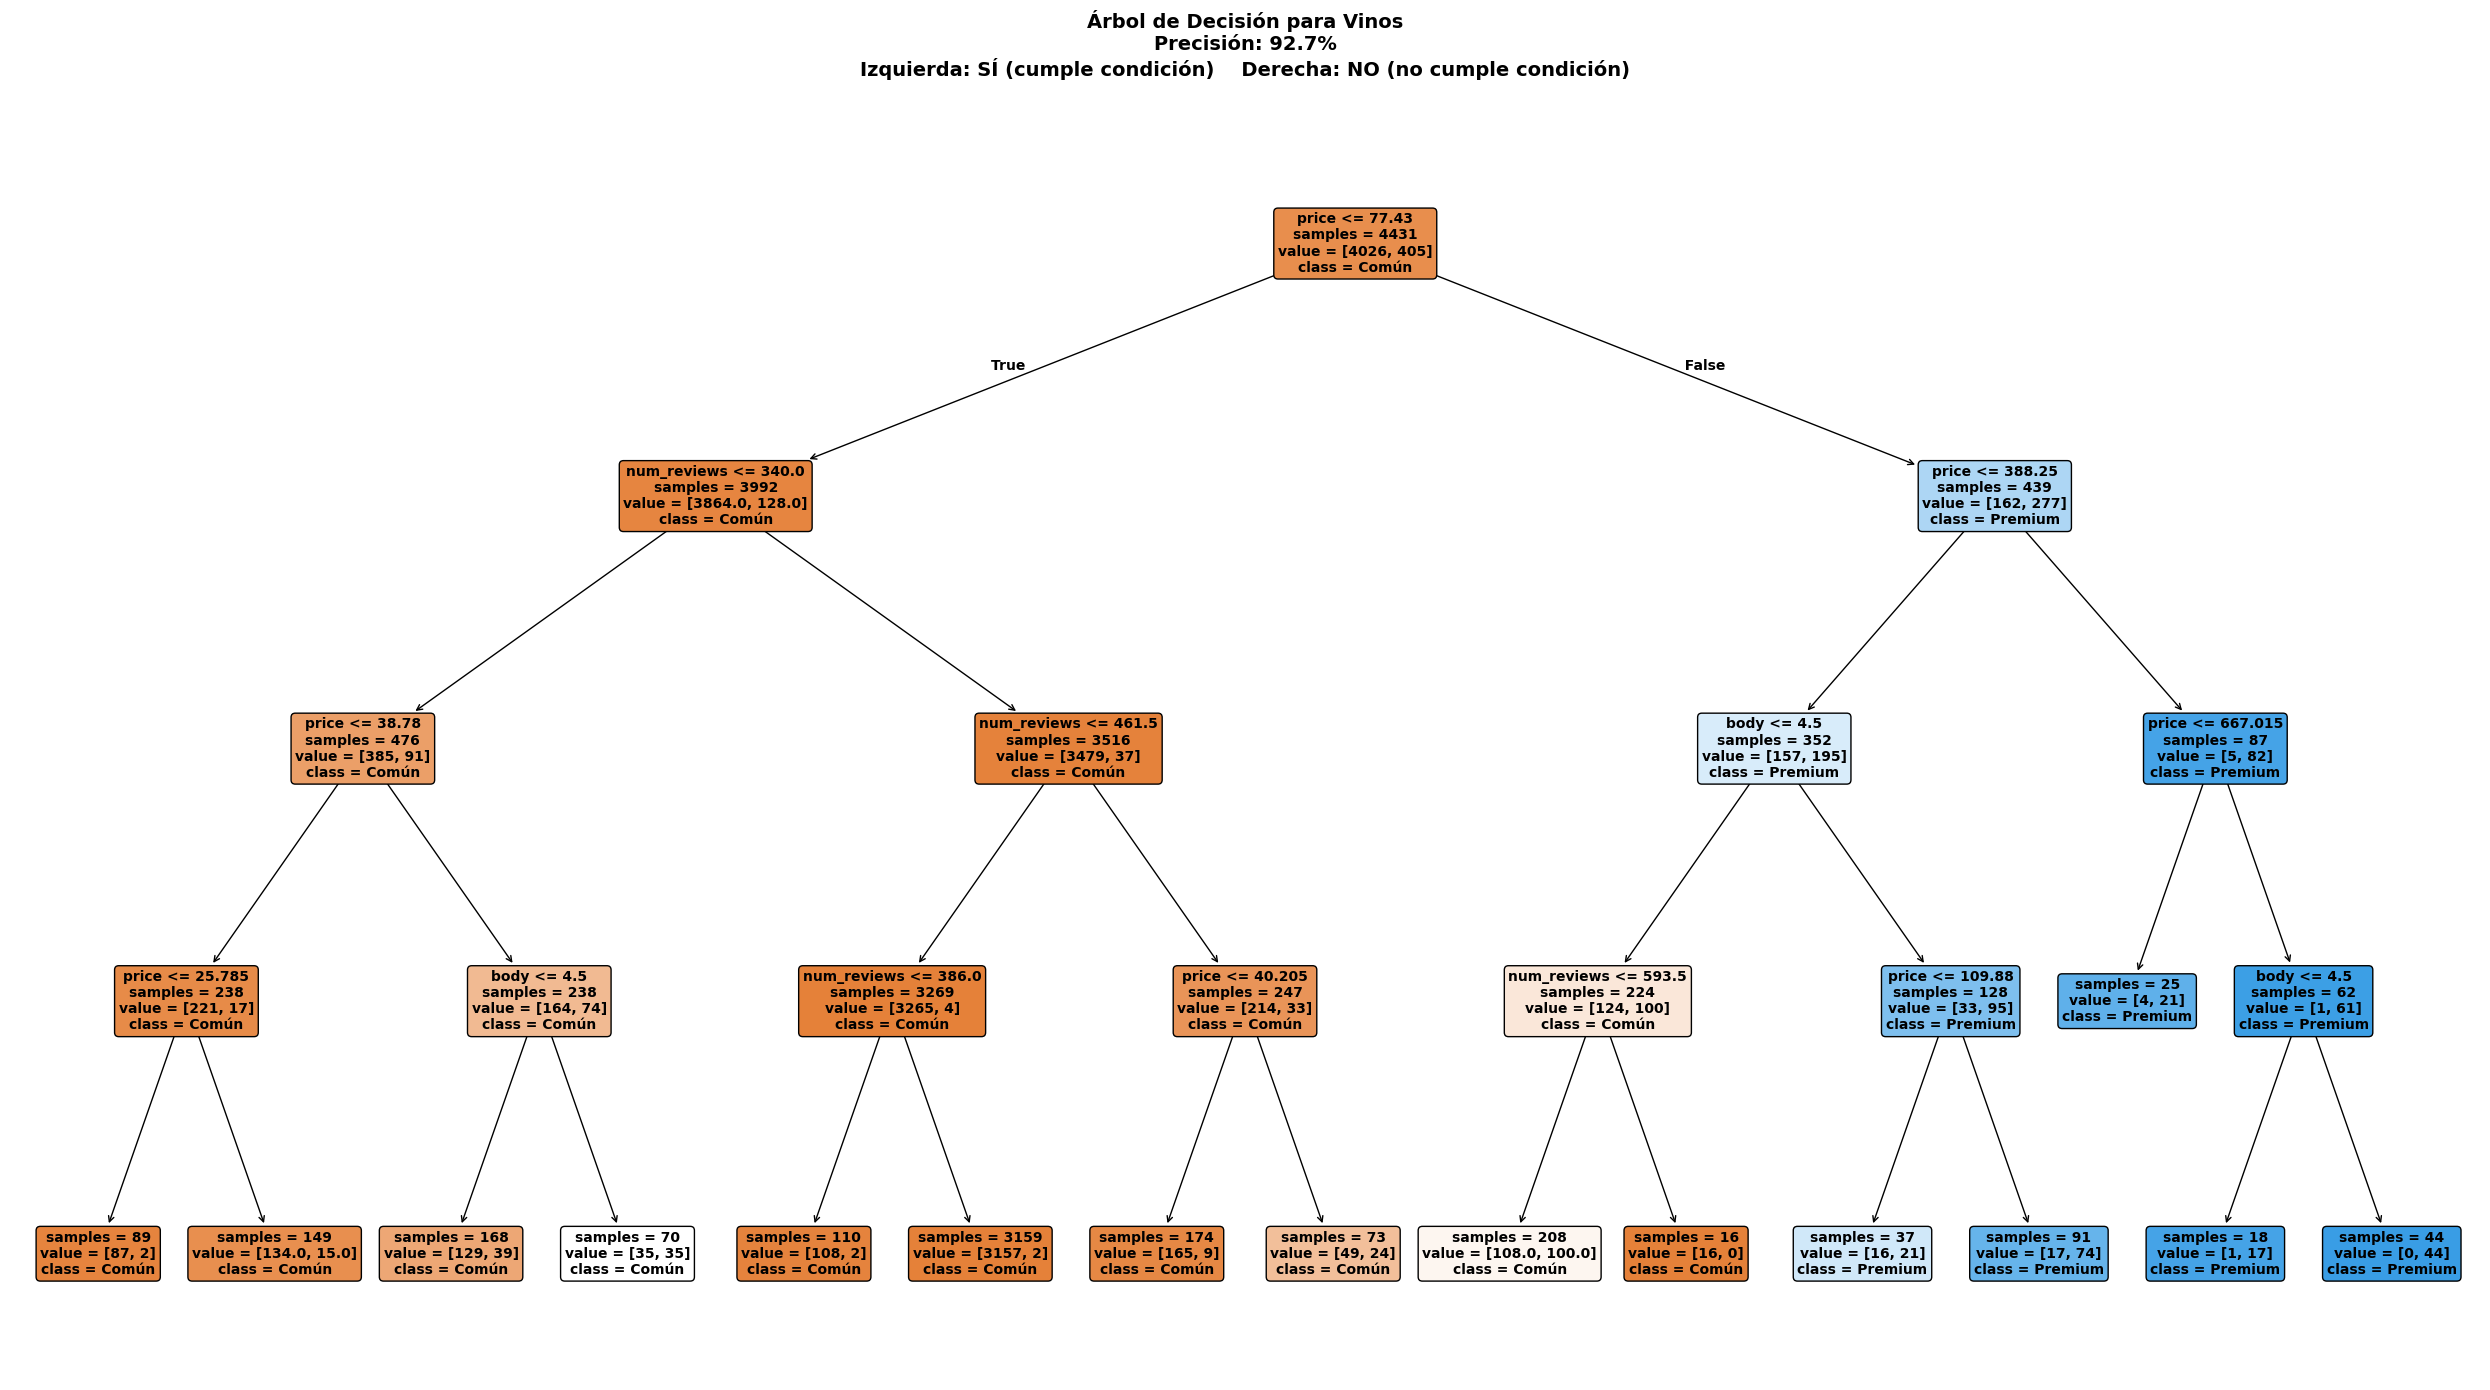

Modelo entrenado. Precisión: 92.68%


In [8]:
plt.figure(figsize=(25, 14))
plt.rcParams.update({'font.size': 10, 'font.weight': 'bold'})

plot_tree(modelo, feature_names=features, class_names=['Común', 'Premium'],
          filled=True, rounded=True, fontsize=10, impurity=False)

plt.title(f'Árbol de Decisión para Vinos\nPrecisión: {precision:.1%}\n'
          f'Izquierda: SÍ (cumple condición)    Derecha: NO (no cumple condición)',
          fontsize=14, fontweight='bold', pad=30)

plt.tight_layout()
plt.savefig('arbol_decision_vinos.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print(f"Modelo entrenado. Precisión: {precision:.2%}")

# Gráfico 2 
Distribución de Predicciones 

Muestra la cantidad de predicciones clasificadas como Común (0) y Premium (1) en el conjunto de prueba. Esto nos da una idea de cómo se comporta el modelo en términos de balance entre clases, nos da un resumen visual de los resultados.

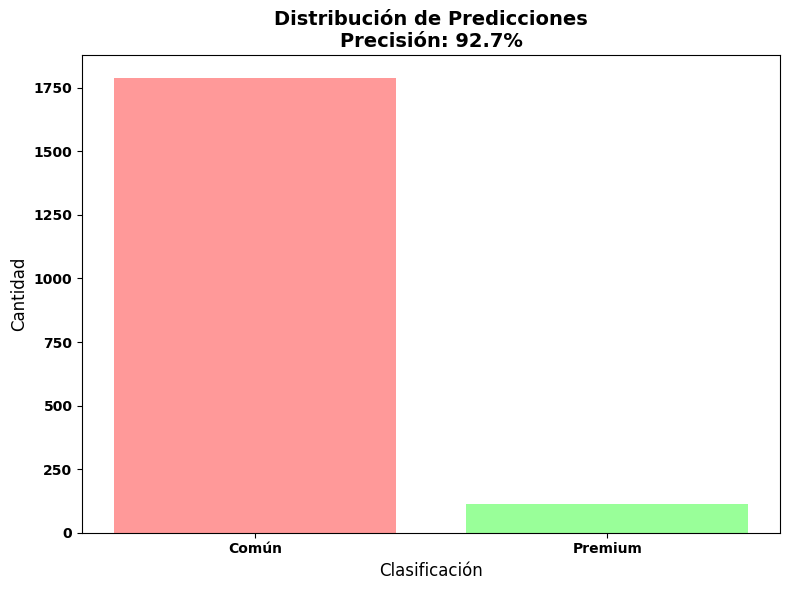

Modelo entrenado. Precisión: 92.68%


In [10]:

y_pred = modelo.predict(X_test)
pred_counts = pd.Series(y_pred).value_counts().sort_index()
labels = ['Común', 'Premium']

plt.figure(figsize=(8, 6))
plt.bar(labels, pred_counts, color=['#FF9999', '#99FF99'])
plt.title(f'Distribución de Predicciones\nPrecisión: {precision:.1%}', fontsize=14, fontweight='bold')
plt.xlabel('Clasificación', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.tight_layout()
plt.savefig('distribucion_predicciones.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print(f"Modelo entrenado. Precisión: {precision:.2%}")